In [1]:
from rsam import RSAM

# Please change variables inside variables.py
from variables import *
from utilities import fill_streams

# Plot RSAM

In [2]:
def main():
    # ============================================
    # Running RSAM per station
    for station in stations:

        # Calculate RSAM per station per date
        for date in dates:
            date_string = date.strftime('%Y-%m-%d')

            # Save stream on a list of streams
            stream: Stream = fill_streams(client, station, date)

            # Make sure stream is not empty
            if stream.count():

                # Run the RSAM per day
                try:
                    rsam = RSAM(stream, resample=resample_rule, bands=bands)
                    rsam.save(rsam_directory)
                except:
                    print(f'⛔ Error in {station}')
                    

        # Combining RSAM CSV results per station name
        print(RSAM.concatenate_csv(rsam_directory, station, resample_rule))
    
    # Plot RSAM
    # RSAM.plot(rsam_directory, stations, resample_rule, axvspans=continuous_eruptions)
    RSAM.plot_single_graph(rsam_directory, stations[0], resample_rule, axvspans=continuous_eruptions)


In [3]:
# main()

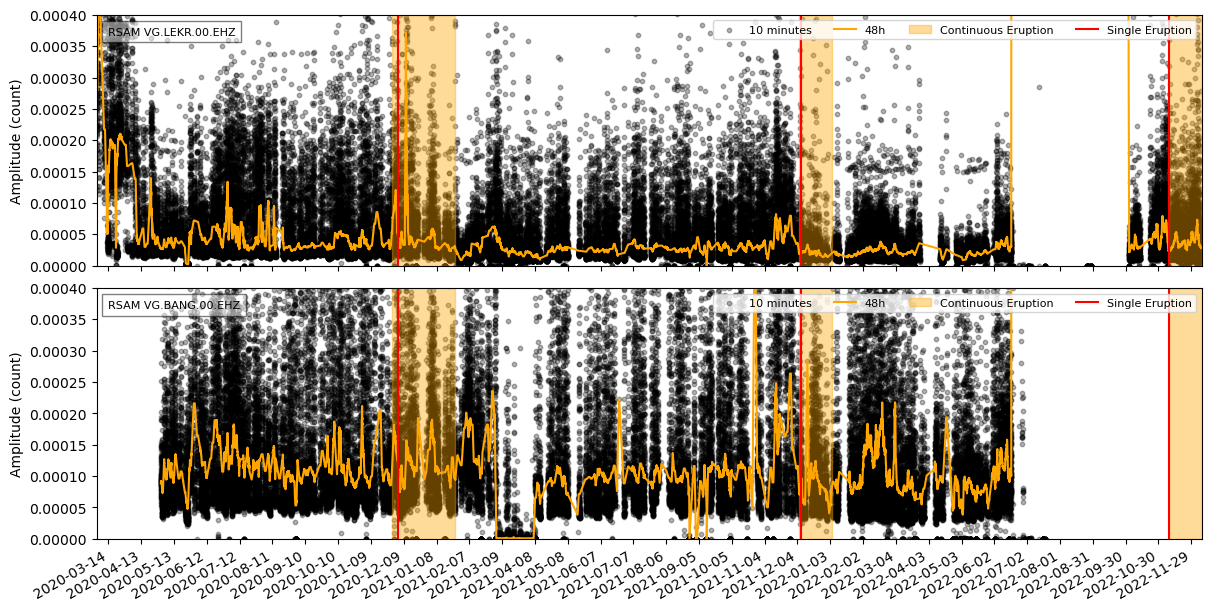

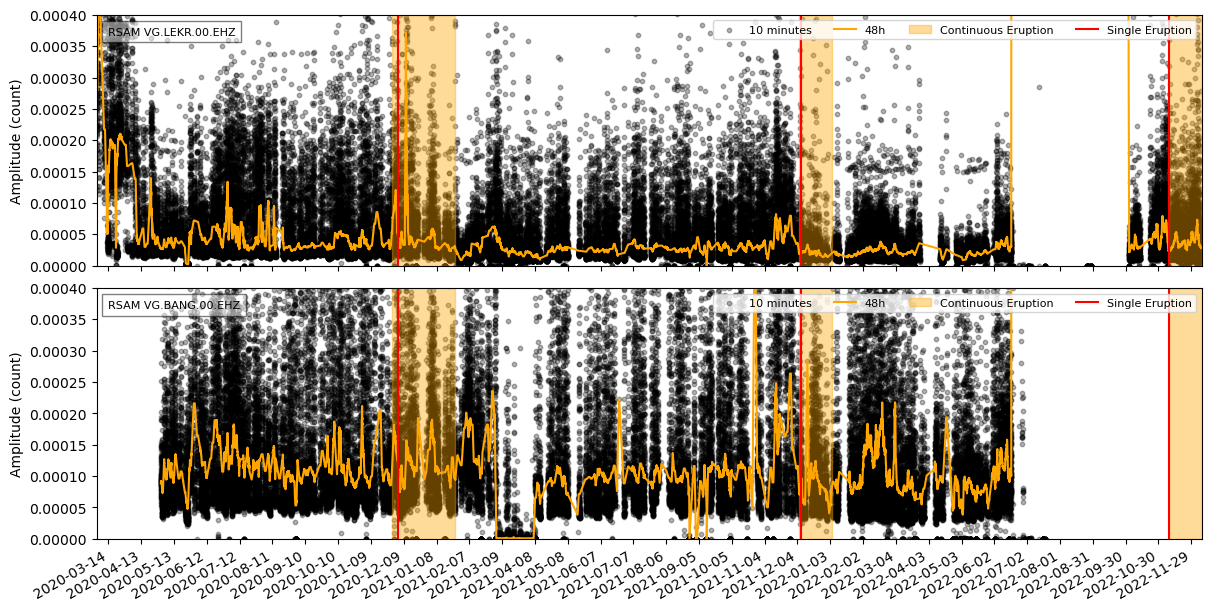

In [4]:
RSAM.plot(rsam_directory, stations, resample_rule, axvspans=continuous_eruptions, interval_day=30, axvlines=single_eruptions, window='48h')